In [474]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [475]:
df1=pd.read_csv("Titanic_test.csv")
df2=pd.read_csv("Titanic_survival.csv")

In [476]:
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [477]:
df2.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [478]:
merged = pd.merge(left=df1, left_index=True,
                  right=df2, right_index=True,
                  how='inner')

In [479]:
merged.tail()

,PassengerId_x,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId_y,Survived
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1305,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1306,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1307,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1308,0
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,1309,0


In [480]:
merged.head()

,PassengerId_x,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId_y,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,892,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,893,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,894,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,895,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,896,1


In [481]:
merged.shape

(418, 13)

In [482]:
merged.size

5434

In [483]:
del(merged["PassengerId_y"])

In [484]:
merged.rename(columns={"PassengerId_x":"PassengerId"},inplace=True)

In [485]:
merged.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [486]:
#df=pd.concat([df2,df1],axis=1,join_axes=[df1.index])

In [487]:
df=merged

In [488]:
df.shape

(418, 12)

In [489]:
df.size

5016

In [490]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Survived       418 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [491]:
df.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,NaN
top,NaN,NaN,"Wells, Mrs. Arthur Henry (Addie"" Dart Trevaskis)""",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,NaN
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN,0.363636
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN,0.481622
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN,1.000000


In [492]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

# 327 Rows have cabin value as nan(null), so it is ideal to drop cabin column

# Since Age has 86 null values we need to replace it 

# Since Fare has 1 Null Values we need replace it

In [493]:
# Since Fare has only 1 null value we need to replace it 

In [494]:

del(df["Cabin"])

In [495]:
df.shape

(418, 11)

In [496]:
df.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Embarked         3
Survived         2
dtype: int64

In [497]:
print('skewness for age : ', df.Age.skew())
print('skewness for fare : ',df.Fare.skew())

skewness for age :  0.4573612871503845
skewness for fare :  3.6872133081121405


In [498]:
print('Mean fare :',df.Fare.mean()) # mean
print('Median fare :',df.Fare.median()) # median

Mean fare : 35.6271884892086
Median fare : 14.4542


In [499]:
print('Min fare : ',df.Fare.min()) # minimum
print('Max fare : ',df.Fare.max()) # maxmum
print('Fare range : ',df.Fare.max() - df.Fare.min()) # range
print('25 percentile : ',df.Fare.quantile(.25)) # 25 percentile
print('50 percentile : ',df.Fare.quantile(.5)) # 50 percentile
print('75 percentile : ',df.Fare.quantile(.75)) # 75 percentile
print('Variance fare : ',df.Fare.var()) # variance
print('Standard deviation fare : ',df.Fare.std()) # standard deviation

Min fare :  0.0
Max fare :  512.3292
Fare range :  512.3292
25 percentile :  7.8958
50 percentile :  14.4542
75 percentile :  31.5
Variance fare :  3125.6570743195775
Standard deviation fare :  55.90757617997383


In [500]:
df.Sex.value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [501]:
df.Sex.value_counts(normalize=True)

male      0.636364
female    0.363636
Name: Sex, dtype: float64

In [502]:
df.Pclass.value_counts() 

3    218
1    107
2     93
Name: Pclass, dtype: int64

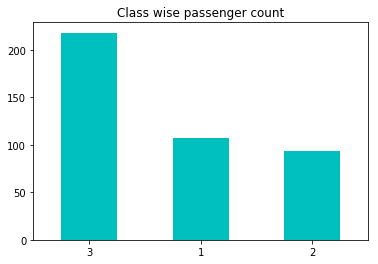

In [503]:
df.Pclass.value_counts().plot(kind='bar',rot = 0, title='Class wise passenger count', color='c')

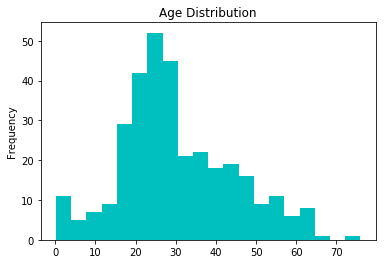

In [504]:
df.Age.plot(kind='hist', title='Age Distribution', color='c', bins=20)

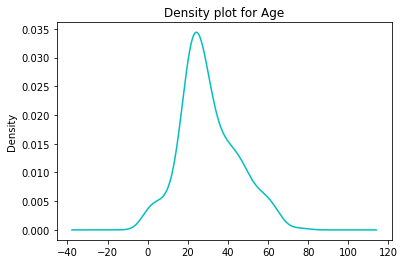

In [505]:

df.Age.plot(kind='kde', title='Density plot for Age', color='c')

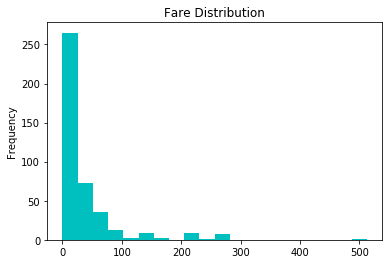

In [506]:
# histogram for fare
df.Fare.plot(kind='hist', title='Fare Distribution', color='c', bins=20);

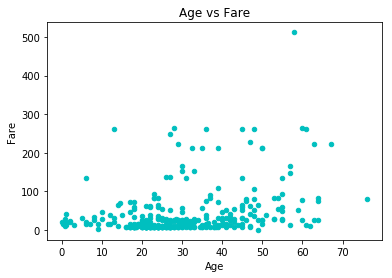

In [507]:
df.plot.scatter(x='Age', y='Fare', color='c', title='Age vs Fare')

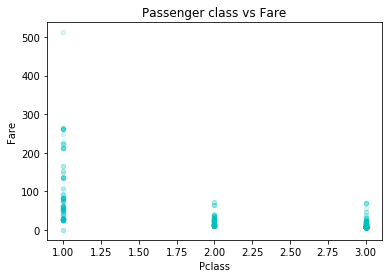

In [508]:
df.plot.scatter(x='Pclass', y='Fare', color='c', title='Passenger class vs Fare', alpha=0.15)

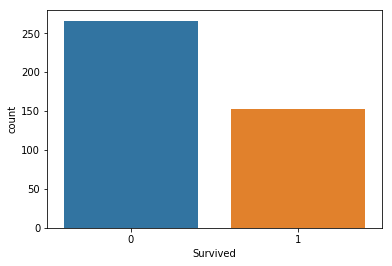

In [509]:
sns.countplot('Survived',data=df)

In [510]:
p=df[df["Survived"]==0].count()
n=df[df["Survived"]==1].count()
t=(p/(n+p))*100
t["Survived"]

63.63636363636363

In [511]:
p=df[df["Survived"]==0].count()
n=df[df["Survived"]==1].count()
t=(n/(n+p))*100
t["Survived"]

36.36363636363637

In [512]:




df.groupby(['Pclass']).agg({'Fare' : 'mean', 'Age' : 'median'})

,Fare,Age
Pclass,,
1,94.280297,42.0
2,22.202104,26.5
3,12.459678,24.0


In [513]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      27.0
Name: Age, dtype: float64

In [514]:
df.groupby(['Pclass'])['Fare','Age'].median()

,Fare,Age
Pclass,,
1,60.0000,42.0
2,15.7500,26.5
3,7.8958,24.0


# Median Age is High for Pclass 1 when compared with Pclass 2 and 3

# Median Fare is High for Pclass1 when compared with  Pclass 2 and 3

In [515]:
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           75.24585
        Q           90.00000
        S           51.67085
2       C           15.04580
        Q           11.52915
        S           21.00000
3       C            7.22920
        Q            7.75000
        S            8.05000
Name: Fare, dtype: float64

In [516]:
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,50,30,72
male,57,63,146


In [517]:
df[df.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,0


In [518]:
mfare = df.loc[(df.Pclass == 3) & (df.Embarked == 'S'),'Fare'].median()
print(mfare)

8.05


In [519]:
df.Fare.fillna(mfare, inplace=True)

In [520]:
df[df.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived


# replace Null values of Age with median age of title

In [521]:
def GetTitle(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

In [522]:
df.Name.map(lambda x : GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'ms', 'col', 'rev', 'dr', 'dona'],
      dtype=object)

In [523]:
def GetTitle(name):
    title_group = {'mr' : 'Mr',     
                    'mrs' : 'Mrs', 
                     'miss' : 'Miss', 
                       'master' : 'Master',
                        'rev' : 'Sir',
                          'dr' : 'Officer',
                           'ms' : 'Mrs',
                           'col' : 'Officer',
                              'dona' : 'Lady'
                     }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [524]:
df['Title'] =  df.Name.map(lambda x : GetTitle(x))

In [525]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1,Mrs


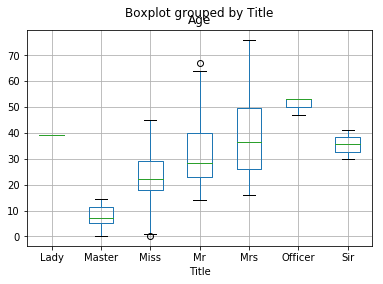

In [526]:
df[df.Age.notnull()].boxplot('Age','Title')

In [527]:
age_median = df.groupby('Title').Age.transform('median')
df.Age.fillna(title_age_median , inplace=True)

In [528]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1,Mrs


In [529]:
df.Age.isnull().sum()

0

In [530]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
Survived       418 non-null int64
Title          418 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [531]:
df.loc[df.Fare == df.Fare.max()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Title
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,C,1,Mrs


# Handling Oultiers

In [532]:
LogFare = np.log(df.Fare + 1.0)

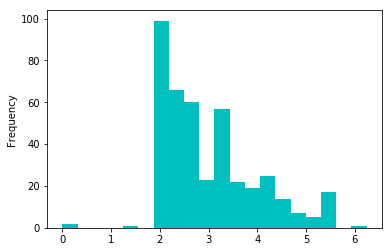

In [533]:
LogFare.plot(kind='hist', color='c', bins=20)

In [534]:
pd.qcut(df.Fare, 4, labels=['very_low','low','high','very_high'])

0       very_low
1       very_low
2            low
3            low
4            low
5            low
6       very_low
7           high
8       very_low
9           high
10      very_low
11          high
12     very_high
13          high
14     very_high
15          high
16           low
17      very_low
18           low
19      very_low
20     very_high
21      very_low
22     very_high
23     very_high
24     very_high
25          high
26     very_high
27      very_low
28          high
29          high
         ...    
388     very_low
389         high
390    very_high
391    very_high
392         high
393          low
394         high
395    very_high
396     very_low
397    very_high
398     very_low
399     very_low
400    very_high
401         high
402    very_high
403    very_high
404         high
405          low
406          low
407    very_high
408     very_low
409          low
410     very_low
411    very_high
412     very_low
413          low
414    very_high
415     very_l

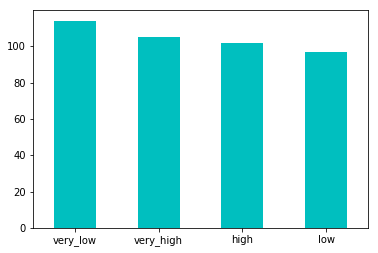

In [535]:
pd.qcut(df.Fare, 4, labels=['very_low','low','high','very_high']).value_counts().plot(kind='bar', color='c', rot=0);

In [536]:
df['Fare_Bin'] = pd.qcut(df.Fare, 4, labels=['very_low','low','high','very_high'])

In [537]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Title,Fare_Bin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,Mr,very_low
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1,Mrs,very_low
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,Mr,low
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,Mr,low
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1,Mrs,low


In [538]:
df['AgeState'] = np.where(df['Age'] >= 18, 'Adult','Child')

In [539]:
df['AgeState'].value_counts()

Adult    373
Child     45
Name: AgeState, dtype: int64

In [540]:
pd.crosstab(df.Survived, df.AgeState)

AgeState,Adult,Child
Survived,,
0,238,28
1,135,17


In [541]:
df['FamilySize'] = df.Parch + df.SibSp + 1

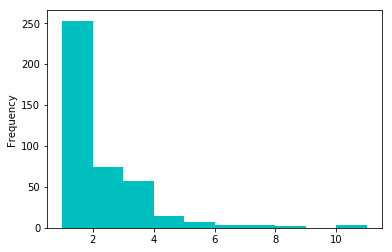

In [542]:
df['FamilySize'].plot(kind='hist', color='c')

In [574]:
df.loc[df.FamilySize == df.FamilySize.max(),['Name','Survived','FamilySize','Ticket']]

,Name,Survived,FamilySize,Ticket
188,"Sage, Miss. Ada",1,11,CA. 2343
342,"Sage, Mr. John George",0,11,CA. 2343
360,"Sage, Master. William Henry",0,11,CA. 2343
365,"Sage, Mrs. John (Annie Bullen)",1,11,CA. 2343


In [544]:
pd.crosstab(df.Survived, df.FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,185,38,27,4,5,1,3,1,2
1,68,36,30,10,2,2,1,1,2


In [545]:
df['IsMother'] = np.where(((df.Sex == 'female') & (df.Parch > 0) & (df.Age > 18) & (df.Title != 'Miss')), 1, 0)

In [546]:
pd.crosstab(df.Survived, df.IsMother)

IsMother,0,1
Survived,,
0,266,0
1,122,30


In [547]:
df.IsMother[df["IsMother"]==1].count()

30

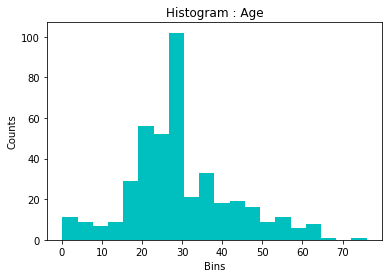

In [548]:
plt.hist(df.Age, bins=20, color='c')
plt.title('Histogram : Age')
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.show()


Text(0,0.5,'Counts')

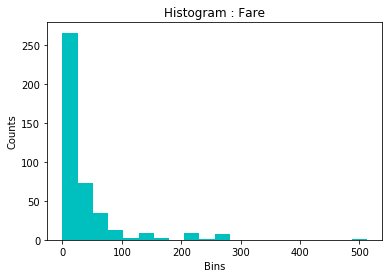

In [549]:
plt.hist(df.Fare, bins=20, color='c')
plt.title('Histogram : Fare')
plt.xlabel('Bins')
plt.ylabel('Counts')

In [550]:
family_survived =  df.groupby(['FamilySize','Survived']).size().unstack()
print(family_survived)

Survived      0   1
FamilySize         
1           185  68
2            38  36
3            27  30
4             4  10
5             5   2
6             1   2
7             3   1
8             1   1
11            2   2


In [551]:
family_survived.columns = ['Not Survived', 'Survived']

In [587]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  1           152
male    0           266
Name: Survived, dtype: int64

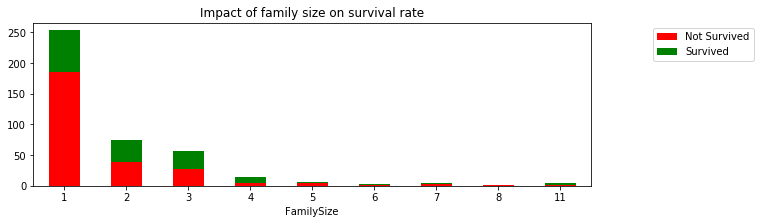

In [552]:
f, ax = plt.subplots(figsize=(10,3))
ax.set_title('Impact of family size on survival rate')
family_survived.plot(kind='bar', stacked=True, color=['red','g'], ax=ax, rot=0)
plt.legend(bbox_to_anchor=(1.3,1.0))
plt.show()

In [553]:
family_survived.sum(axis = 1)

FamilySize
1     253
2      74
3      57
4      14
5       7
6       3
7       4
8       2
11      4
dtype: int64

In [554]:
scaled_family_survived = family_survived.div(family_survived.sum(axis=1), axis=0)

In [555]:
scaled_family_survived.columns = ['Not Survived', 'Survived']

In [556]:
scaled_family_survived

,Not Survived,Survived
FamilySize,,
1,0.731225,0.268775
2,0.513514,0.486486
3,0.473684,0.526316
4,0.285714,0.714286
5,0.714286,0.285714
6,0.333333,0.666667
7,0.750000,0.250000
8,0.500000,0.500000
11,0.500000,0.500000


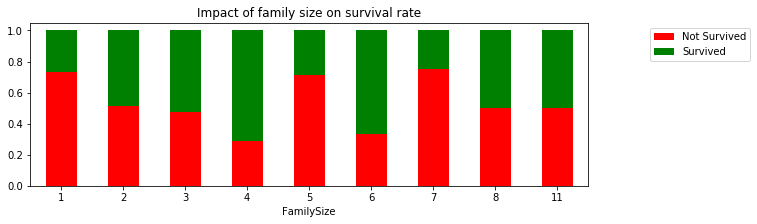

In [557]:
f, ax = plt.subplots(figsize=(10,3))
ax.set_title('Impact of family size on survival rate')
scaled_family_survived.plot(kind='bar', stacked=True, color=['red','g'], ax=ax, rot=0)
plt.legend(bbox_to_anchor=(1.3,1.0))
plt.show()

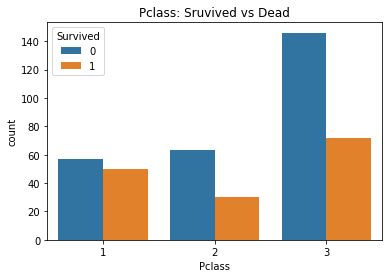

In [558]:
sns.countplot('Pclass', hue='Survived', data=df)
plt.title('Pclass: Sruvived vs Dead')
plt.show()

In [559]:
pd.crosstab(df.SibSp,df.Pclass).style.background_gradient('summer_r')

Pclass,1,2,3
SibSp,,,
0,61,62,160
1,42,27,41
2,3,4,7
3,1,0,3
4,0,0,4
5,0,0,1
8,0,0,2


In [560]:
pd.crosstab([df.SibSp],df.Survived).style.background_gradient('summer_r')

Survived,0,1
SibSp,,
0,195,88
1,56,54
2,8,6
3,3,1
4,3,1
5,0,1
8,1,1


In [ ]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df)
plt.show()

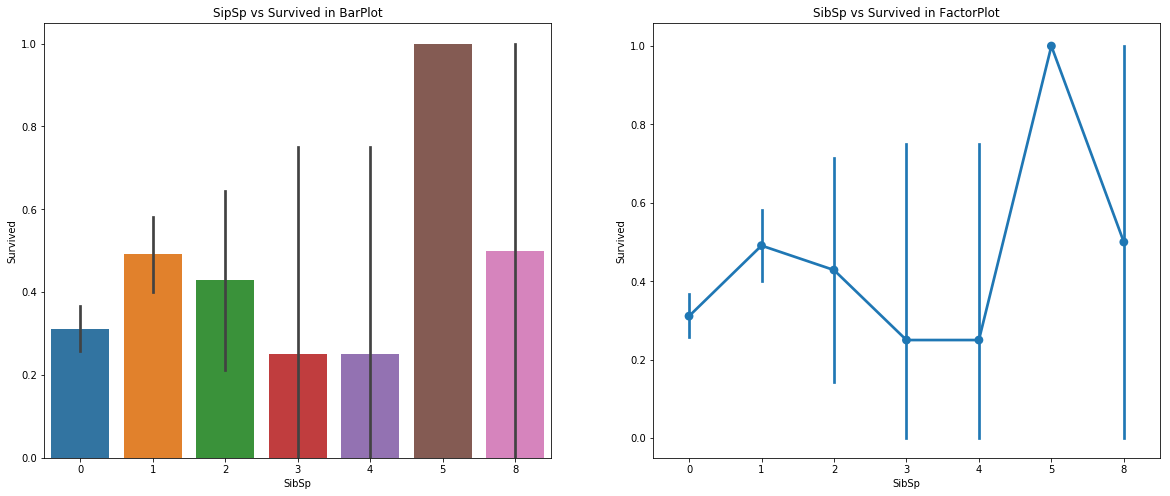

In [561]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived', data=df,ax=ax[0])
ax[0].set_title('SipSp vs Survived in BarPlot')
sns.factorplot('SibSp','Survived', data=df,ax=ax[1])
ax[1].set_title('SibSp vs Survived in FactorPlot')
plt.close(2)
plt.show()

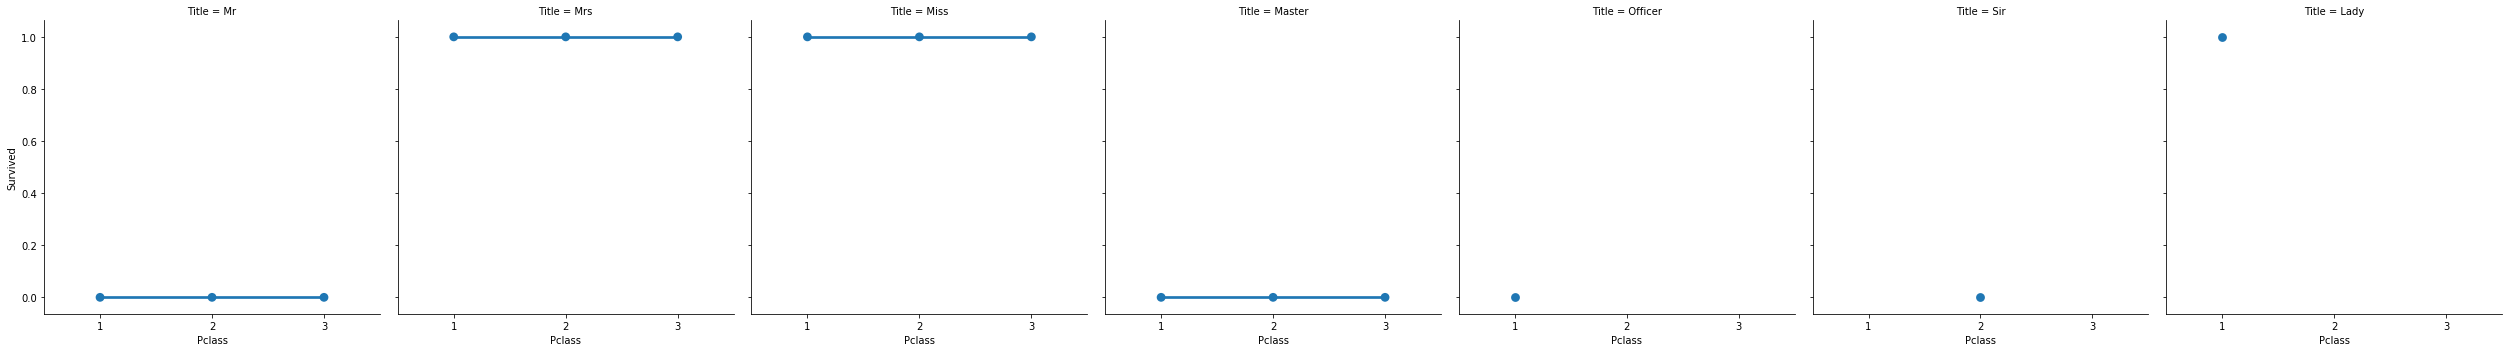

In [604]:

sns.factorplot('Pclass','Survived',col='Title',data=df)
plt.show()


# Insights

# a) Survival Rate - more than 63.66 % of the people were not able to survive the disaster, 36.36% were able to Survive

Survival rate of men is very lower compared to women.
Mothers had the best Survival rate, Passenger class 3 had a low survival rate


# b)  what kind of passengers did not survive

Males did not survive

Passenger Class 1 had a low survival rate followed by Pclass 3, while pclass 3 has low survival rate

# C)
Variables Sex are significant Explaining the Fate of the passenger

all  Men did not survive
Survival Rate of Individual woman was higher than individual man
Most of the women and Children survived irrespective of their Pclass
All Mothers Survived
Family Size of 4 has the best survival rate(there is only one family with 5 sibiling)